In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import math

def circleTreePoints(x,y) :
    """ This function draw a circle that goes throught 3 points whose coordinates are given by x and y"""

    [x1,x2,x3] = x
    [y1,y2,y3] = y

    """ The equation of the cirle is given by the following equation :

    det([[x**2,y**2,x,y,1],
         [x1**2,y1**2,x1,y1,1],
         [x2**2,y2**2,x2,y2,1],
         [x3**2,y3**2,x3,y3,1]]) = 0

    which is tantamount to the equation :

    a(x**2 + y**2) + b*x + c*y + d = 0
         """
    a = x1*y2 - x1*y3 - y1*x2 + y1*x3 + x2*y3 - y2*x3

    b = (x1**2)*y3 + (y1**2)*y3 - y2*(x1**2) - (y1**2)*y2 + y1*(x2**2) + y1*(y2**2) - y1*(x3**2) - y1*(y3**2) - y3*(x2**2) - y3*(y2**2) + (x3**2)*y2 + y2*(y3**2)

    c = - (x1**2)*x3 - (y1**2)*x3 + x2*(x1**2) + (y1**2)*x2 - x1*(x2**2) - x1*(y2**2) + x1*(x3**2) + x1*(y3**2) + x3*(x2**2) + x3*(y2**2) - (x3**2)*x2 - x2*(y3**2)

    d = y2*x3*(x1**2 + y1**2) - x2*y3*(x1**2 + y1**2) + x1*y3*(x2**2 + y2**2) - x1*y2*(x3**2 + y3**2) + y1*x2*(x3**2 + y3**2) - y1*x3*(x2**2 + y2**2)

    xc = -b/(2*a)
    yc = -c/(2*a)
    RR = (b**2 + c**2)/((2*a)**2) - (d/a)
    R = math.sqrt(RR)

    circle = plt.Circle((xc,yc),R,fill=False,alpha = 0.3)



    """considering z<i> whose affix is the point <i> i.e. (x<i>,y<i>). theta<i> is the principal complex angle of z<i> considering the affine space centered on the affix of (xc + i*yc) """

    if (x1-xc) >= 0 :
        theta1 = math.atan((y1-yc)/(x1-xc))
    else :
        theta1 = math.atan((y1-yc)/(x1-xc)) + math.pi

    if (x2-xc) >= 0 :
        theta2 = math.atan((y2-yc)/(x2-xc))
    else :
        theta2 = math.atan((y2-yc)/(x2-xc)) + math.pi

    if (x3-xc) >= 0 :
        theta3 = math.atan((y3-yc)/(x3-xc))
    else :
        theta3 = math.atan((y3-yc)/(x3-xc)) + math.pi


    """The arc of circle that connect the point i and i+2 must go through the point i+1"""
    if theta3 < theta2 and theta2 < theta1 :
        (theta1,theta3) = (theta3, theta1)


    arc_circle = patches.Arc(xy = (xc,yc),
                             width = 2*R,
                             height = 2*R,
                             angle = 0,
                             theta1 = theta1*180/math.pi,
                             theta2 = theta3*180/math.pi, color = "red",linewidth = 3)

    return circle, arc_circle



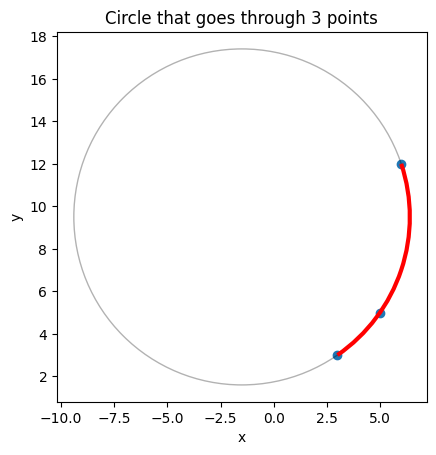

In [10]:
#Random sample of points
x = np.array([3,5,6])
y = np.array([3,5,12])

circle, arc_circle = circleTreePoints(x,y)

"""gca : get the current axis"""
ax = plt.gca()
ax.scatter(x,y)
ax.set_aspect('equal', 'box')
ax.add_patch(circle)
ax.add_patch(arc_circle)
ax.set_title("Circle that goes through 3 points")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

In [12]:
def circleMultiplePoints(points) :

    """ points : a list. each element (point) is a couple (x,y) that represents the coordinate of the point.

    This function displays points, and draws circles that goes throught them, three by three.

    Example : circleMultiplePoints(pointsGenerator(0.5,10,50,lambda x : math.cos(x) + math.sin(x)**2,0.2, False))"""

    xs = []
    ys = []
    for point in points :
        xs.append(point[0])
        ys.append(point[1])

    """ A list. LinkPointsCirlces[i] is a list that contains the index of circles that goes throught the point points[i] """
    LinkPointsCircles = [[] for k in range(len(points))]



    circles = []
    arc_circles = []

    i = 0

    while i <= len(points)-3 :
        x = [xs[i],xs[i+1],xs[i+2]]
        y = [ys[i],ys[i+1],ys[i+2]]

        circle, arc_circle = circleTreePoints(x,y)
        circles.append(circle)
        arc_circles.append(arc_circle)


        LinkPointsCircles[i].append(i//2)
        LinkPointsCircles[i+1].append(i//2)
        LinkPointsCircles[i+2].append(i//2)

        i +=2 #Circles have at least one point that is "owned" by another circle

    return circles, arc_circles
